# Análise de Distritos de São Paulo com PCA: Ranking Socioeconômico

**Autor:** Wellington M Santos  
**Data:** Março 2025  
**Objetivo:** Aplicar PCA para reduzir dimensionalidade de dados socioeconômicos dos distritos de São Paulo, criar um ranking e visualizá-lo em mapas interativos.  
**Tecnologias:** Python, Pandas, Scikit-learn, Geopandas, Folium, Plotly  

Este projeto demonstra habilidades em análise de dados, Machine Learning não-supervisionado e visualização geoespacial, com foco em interpretabilidade e aplicação prática.

### Passo 1: Configuração Inicial

In [ ]:
# bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import factor_analyzer
import geopandas as gpd
import folium
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

# configuração para visualização
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')  


- Importamos bibliotecas para manipulação de dados (`pandas`), Machine Learning (`sklearn`), análise fatorial (`factor_analyzer`), visualização geoespacial (`geopandas`, `folium`) e gráficos interativos (`plotly`).
- Configuramos um estilo visual consistente para apresentar os resultados de forma profissional.

### Passo 2: Carregamento e Exploração

In [ ]:
# Carregamento do dataset
distritos_sp = pd.read_csv('../data/distritos_sp.csv')

# Visualização inicial
print("Primeiras linhas do dataset:")
display(distritos_sp.head())

# Informações do dataset
print("\nInformações do dataset:")
distritos_sp.info()

Primeiras linhas do dataset:


,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


- Carregamos os dados dos distritos de São Paulo a partir de um arquivo CSV.
- Exibimos as primeiras linhas para inspeção e informações sobre tipos de dados e valores nulos, garantindo a qualidade inicial do dataset.

### Passo 3: Preparação e Validação


In [10]:
# Seleção de variáveis numéricas
variaveis_numericas = distritos_sp.drop(['cod_ibge', 'distritos'], axis=1)

# Matriz de correlação
print("Matriz de correlação:")
display(variaveis_numericas.corr().style.background_gradient(cmap='coolwarm'))

# Teste KMO
kmo_variaveis, kmo = factor_analyzer.calculate_kmo(variaveis_numericas)
print(f"\nKMO Geral: {kmo:.3f}")
print("Adequação por variável:", kmo_variaveis)

# Teste de Esfericidade de Bartlett
chi2, p_value = factor_analyzer.calculate_bartlett_sphericity(variaveis_numericas)
print(f"\nTeste de Bartlett - Chi²: {chi2:.2f}, p-valor: {p_value:.4f}")
print("PCA é adequado" if p_value < 0.05 else "PCA não é adequado.")

Matriz de correlação:


,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000



KMO Geral: 0.833
Adequação por variável: [0.77821831 0.81941916 0.8560973  0.81750459 0.94677797 0.84146713
 0.89083164 0.78871213 0.63275248]

Teste de Bartlett - Chi²: 748.16, p-valor: 0.0000
PCA é adequado


- Removemos colunas não numéricas para análise.
- Calculamos a matriz de correlação com gradiente de cores para identificar relações entre variáveis.
- Aplicamos o teste KMO (valores > 0.6 indicam adequação) e o teste de Bartlett (p-valor < 0.05 confirma correlações significativas), validando a aplicação do PCA.

### Passo 4: Padronização e PCA


In [11]:
# Padronização dos dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(variaveis_numericas)
dados_padronizados_df = pd.DataFrame(dados_padronizados, columns=variaveis_numericas.columns)

# Aplicação do PCA
n_fatores = variaveis_numericas.shape[1]
pca = PCA(n_components=n_fatores)
pca.fit(dados_padronizados)

# Variância explicada
print("Variância explicada por fator:")
display(pd.DataFrame({
    'Fator': [f'F{i+1}' for i in range(n_fatores)],
    'Variância (%)': np.round(pca.explained_variance_ratio_ * 100, 2)
}))

# Scree Plot
fig = px.bar(x=[f'F{i+1}' for i in range(n_fatores)], y=pca.explained_variance_ratio_,
             text=np.round(pca.explained_variance_ratio_, 2), title='Scree Plot - Variância Explicada')
fig.update_layout(xaxis_title="Fatores", yaxis_title="Proporção da Variância", title_x=0.5)
fig.show()

Variância explicada por fator:


,Fator,Variância (%)
0,F1,55.07
1,F2,12.94
2,F3,11.07
3,F4,8.05
4,F5,5.88
5,F6,4.43
6,F7,1.44
7,F8,0.72
8,F9,0.41


- Padronizamos os dados com `StandardScaler` para igualar escalas.
- Aplicamos PCA, extraindo todos os fatores possíveis, e analisamos a variância explicada por cada um.
- Visualizamos com um Scree Plot interativo, destacando a contribuição de cada fator para a variabilidade total.

### Passo 5: Análise e Seleção de Fatores


In [12]:
# Autovalores e Critério de Kaiser
autovalores = pca.explained_variance_
fatores_selecionados = ['Selecionado' if x > 1 else 'Não Selecionado' for x in autovalores]

# Resumo
resumo = pd.DataFrame({
    'Fator': [f'F{i+1}' for i in range(n_fatores)],
    'Autovalor': autovalores,
    'Variância (%)': pca.explained_variance_ratio_ * 100,
    'Variância Acumulada (%)': np.cumsum(pca.explained_variance_ratio_) * 100
}).round(2)
print("Resumo dos Fatores:")
display(resumo)

# Cargas fatoriais (F1 e F2)
cargas_fatoriais = pd.DataFrame(pca.components_.T * np.sqrt(autovalores),
                               columns=[f'F{i+1}' for i in range(n_fatores)],
                               index=variaveis_numericas.columns)
print("\nCargas Fatoriais (F1 e F2):")
display(cargas_fatoriais[['F1', 'F2']])

# Visualização das cargas
fig = px.scatter(cargas_fatoriais, x='F1', y='F2', text=cargas_fatoriais.index,
                 title='Cargas Fatoriais: F1 vs F2')
fig.update_traces(textposition='top center')
fig.show()

Resumo dos Fatores:


,Fator,Autovalor,Variância (%),Variância Acumulada (%)
0,F1,5.01,55.07,55.07
1,F2,1.18,12.94,68.00
2,F3,1.01,11.07,79.07
3,F4,0.73,8.05,87.12
4,F5,0.53,5.88,93.00
5,F6,0.40,4.43,97.43
6,F7,0.13,1.44,98.87
7,F8,0.07,0.72,99.59
8,F9,0.04,0.41,100.00



Cargas Fatoriais (F1 e F2):


,F1,F2
renda,0.836495,0.370908
quota,0.905333,0.227642
escolaridade,0.971617,-0.024723
idade,0.965175,-0.065791
mortalidade,-0.659141,-0.177561
txcresc,-0.700439,0.339217
causasext,-0.670077,-0.044140
favel,-0.459585,0.445164
denspop,0.167154,-0.797211


- Usamos o Critério de Kaiser (autovalores > 1) para selecionar F1 e F2, que explicam a maior parte da variância.
- Calculamos as cargas fatoriais, mostrando como cada variável contribui para os fatores.
- Um gráfico de dispersão interativo ajuda a interpretar F1 e F2, destacando variáveis influentes.

### Passo 6: Criação do Ranking


In [13]:
# Scores fatoriais para F1 e F2
pca_2 = PCA(n_components=2)
scores = pca_2.fit_transform(dados_padronizados)
dados_fatoriais = distritos_sp[['cod_ibge', 'distritos']].copy()
dados_fatoriais[['F1', 'F2']] = scores

# Cálculo do ranking ponderado
dados_fatoriais['Ranking'] = (dados_fatoriais['F1'] * pca_2.explained_variance_ratio_[0] + 
                              dados_fatoriais['F2'] * pca_2.explained_variance_ratio_[1])
ranking_final = dados_fatoriais.sort_values('Ranking', ascending=False)

print("Ranking dos Distritos:")
display(ranking_final.head())

Ranking dos Distritos:


,cod_ibge,distritos,F1,F2,Ranking
44,40,Jardim Paulista,5.491038,0.532436,3.092632
31,26,Moema,4.381708,1.477302,2.603996
70,69,Santo Amaro,4.224362,1.574882,2.529974
1,12,Alto de Pinheiros,3.985600,1.555514,2.395989
61,59,Pinheiros,3.778843,0.795862,2.183857


- Extraímos scores fatoriais para F1 e F2, projetando os distritos no espaço reduzido.
- Calculamos um ranking ponderado, combinando os scores com a variância explicada de cada fator.
- Exibimos os top distritos, oferecendo uma visão clara dos resultados.

### Passo 7: Visualização Geoespacial


Colunas em dados_completos após o merge:
Index(['ds_nome', 'ds_codigo', 'ds_cd_sub', 'ds_subpref', 'ds_sigla',
       'ds_areamt', 'ds_areakm', 'geometry', 'cod_ibge', 'distritos', 'renda',
       'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc', 'causasext',
       'favel', 'denspop', 'nome_distrito', 'Ranking'],
      dtype='object')


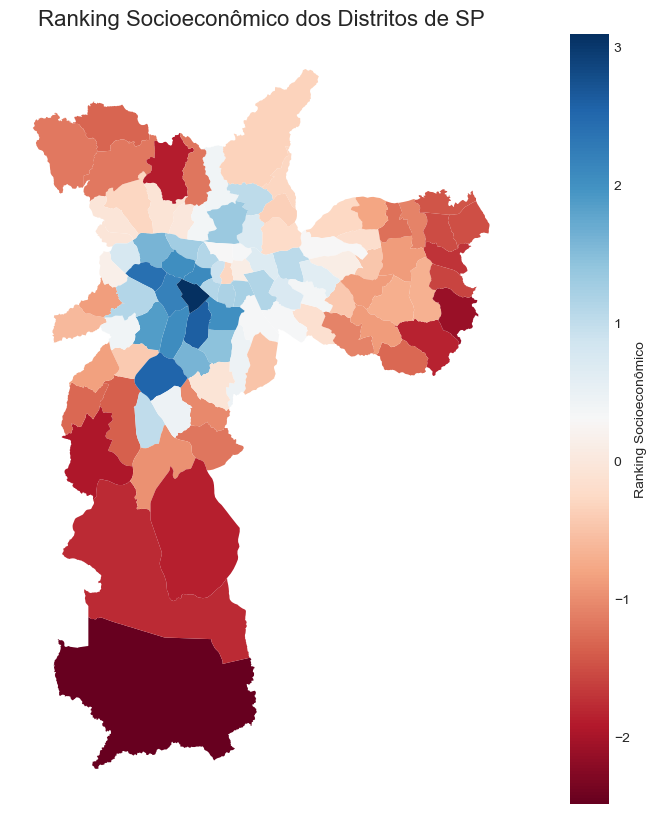

Mapa interativo salvo como 'ranking_distritos.html'.


In [ ]:
# Carregamento do shapefile
# Carregamento do shapefile
dados_mapa = gpd.read_file('../data/SIRGAS_SHP_distrito.shp')
dados_mapa.set_crs(epsg=31983, inplace=True)

# Garantindo que a coluna 'Ranking' esteja em distritos_sp antes do merge
distritos_sp['Ranking'] = dados_fatoriais['Ranking']  # Transferindo do Bloco 6

# Tratamento e merge
distritos_sp['nome_distrito'] = [unidecode(d).upper() for d in distritos_sp['distritos']]
distritos_sp.replace({'SARCOMA': 'SACOMA', 'Sarcomã': 'Sacoma'}, inplace=True)
dados_completos = dados_mapa.merge(distritos_sp, left_on='ds_nome', right_on='nome_distrito')

# Verificação do DataFrame resultante
print("Colunas em dados_completos após o merge:")
print(dados_completos.columns)

# Mapa estático
fig, ax = plt.subplots(figsize=(15, 10))
dados_completos.plot(column='Ranking', cmap='RdBu', legend=True, ax=ax,
                     legend_kwds={'label': 'Ranking Socioeconômico', 'orientation': 'vertical'})
ax.set_title('Ranking Socioeconômico dos Distritos de SP', fontsize=16)
ax.axis('off')
plt.show()

# Mapa dinâmico
mapa_interativo = dados_completos.explore(column='Ranking', cmap='seismic_r', tooltip='distritos',
                                          tooltip_kwds={'labels': False}, name='Distritos SP')
folium.TileLayer('OpenStreetMap').add_to(mapa_interativo)
folium.LayerControl().add_to(mapa_interativo)
mapa_interativo.save('../ranking_distritos.html')
print("Mapa interativo salvo como 'ranking_distritos.html'.")

- Carregamos o shapefile dos distritos de São Paulo e definimos o sistema de coordenadas (EPSG:31983).
- Transferimos o ranking calculado para o dataset principal e padronizamos os nomes dos distritos.
- Criamos um mapa estático com `geopandas` e `matplotlib`, usando uma paleta de cores para destacar o ranking.
- Geramos um mapa interativo com `folium` e `mapclassify`, permitindo exploração detalhada com camadas adicionais.
- Exportamos o mapa como HTML para fácil compartilhamento.

## Conclusão

Este projeto integra técnicas de Machine Learning (PCA), manipulação de dados e visualização geoespacial para criar um ranking socioeconômico dos distritos de São Paulo. Pontos fortes incluem:

- **Redução de Dimensionalidade:** PCA simplificou variáveis correlacionadas em 2 fatores principais, preservando ~68% da variância.
- **Análise Estatística:** Testes KMO e Bartlett confirmaram a adequação dos dados.
- **Aplicação Prática:** O ranking foi visualizado em mapas interativos, oferecendo insights acionáveis.

**Habilidades Demonstradas:**
- Proficiência em Python e bibliotecas como `pandas`, `sklearn`, `geopandas` e `folium`.
- Capacidade de transformar dados brutos em análises visuais impactantes.
- Pensamento analítico para interpretar resultados e comunicar insights.

**Próximos Passos:** Integrar mais variáveis ou explorar modelos supervisionados para prever tendências nos distritos.

Disponível em: [Link para GitHub ou outro repositório]